# Multiple linear regression

In [38]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,10)

In [39]:
# Load the data into a pandas dataframe
players = pd.read_csv('playerStats2.csv')
players.head()

,Map,Player,Kills,Deaths,ADR,KAST%,Rating,MatchID
0,Nuke,4216,22,19,85.0,69.0,1.17,2311133/binary-dragons-vs-alpha-binary-dragons...
1,Nuke,3543,26,23,83.5,58.6,1.10,2311133/binary-dragons-vs-alpha-binary-dragons...
2,Nuke,3972,20,23,78.2,75.9,1.02,2311133/binary-dragons-vs-alpha-binary-dragons...
3,Nuke,2476,17,20,68.1,79.3,0.97,2311133/binary-dragons-vs-alpha-binary-dragons...
4,Nuke,2299,17,20,66.3,65.5,0.86,2311133/binary-dragons-vs-alpha-binary-dragons...


In [40]:
players.describe()

,Player,Kills,Deaths,ADR,KAST%,Rating
count,234585.000000,234585.000000,234585.000000,234584.000000,234585.000000,234585.000000
mean,8224.033830,17.716892,17.755368,75.562365,69.032025,1.062519
std,3686.464945,6.426620,4.936671,19.175423,12.645734,0.352191
min,2.000000,0.000000,0.000000,0.000000,5.600000,0.020000
25%,7218.000000,13.000000,15.000000,62.500000,60.900000,0.820000
50%,8789.000000,17.000000,18.000000,74.600000,69.600000,1.040000
75%,10693.000000,22.000000,20.000000,87.500000,77.800000,1.280000
max,15651.000000,91.000000,94.000000,206.700000,100.000000,3.450000


In [41]:
players.corr()


,Player,Kills,Deaths,ADR,KAST%,Rating
Player,1.000000,-0.025385,0.028689,-0.020219,-0.047879,-0.042919
Kills,-0.025385,1.000000,0.191377,0.720539,0.501117,0.716360
Deaths,0.028689,0.191377,1.000000,-0.242039,-0.421411,-0.460916
ADR,-0.020219,0.720539,-0.242039,1.000000,0.602392,0.877931
KAST%,-0.047879,0.501117,-0.421411,0.602392,1.000000,0.800503
Rating,-0.042919,0.716360,-0.460916,0.877931,0.800503,1.000000


### From above details we can see that two independent variables "Kills" and "ADR" are correlated.

### In the multivariate model predictor variables are not independent of all other predictor variables, As predictor variables "Kills" and "ADR" are correlated in my model ."Deaths" will variable will not help in prediction of Ratings

In [42]:
#sns.pairplot(players)

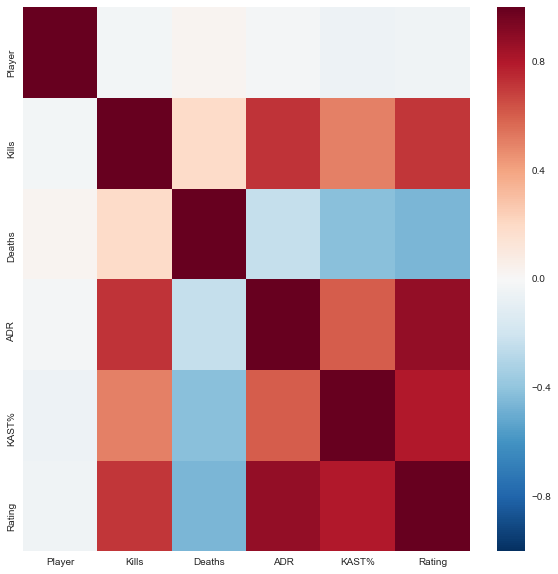

In [43]:
sns.heatmap(players.corr())

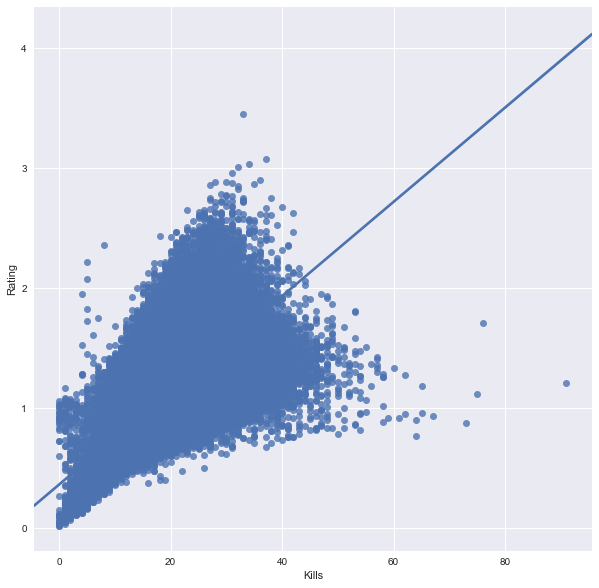

In [44]:
sns.regplot(x="Kills", y="Rating", data=players)

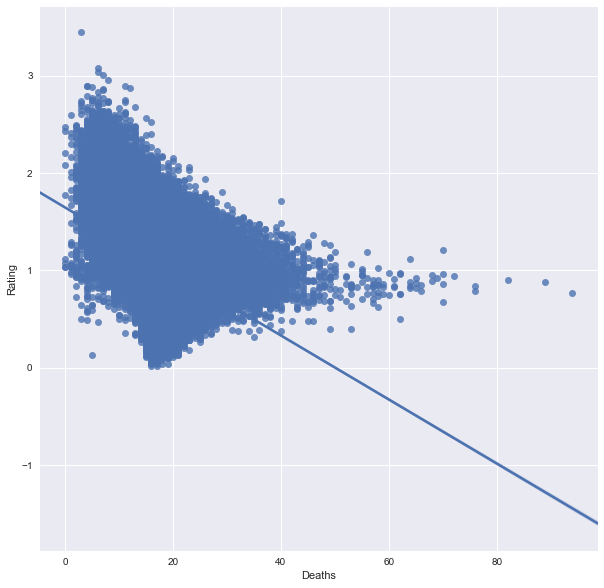

In [45]:
sns.regplot(x="Deaths", y="Rating", data=players)

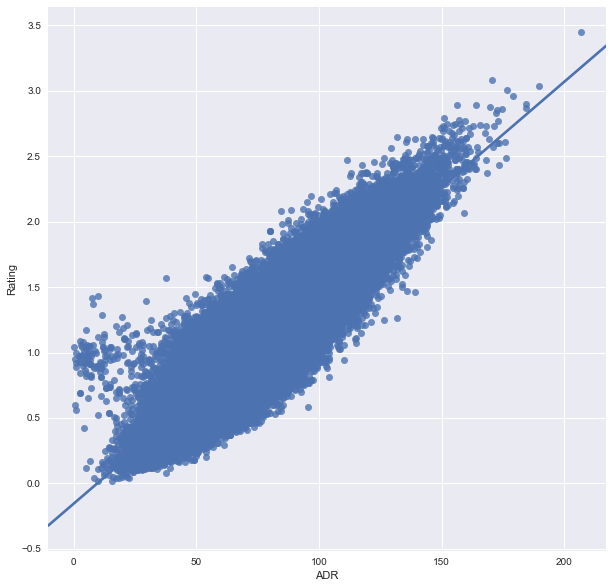

In [46]:
sns.regplot(x="ADR", y="Rating", data=players)

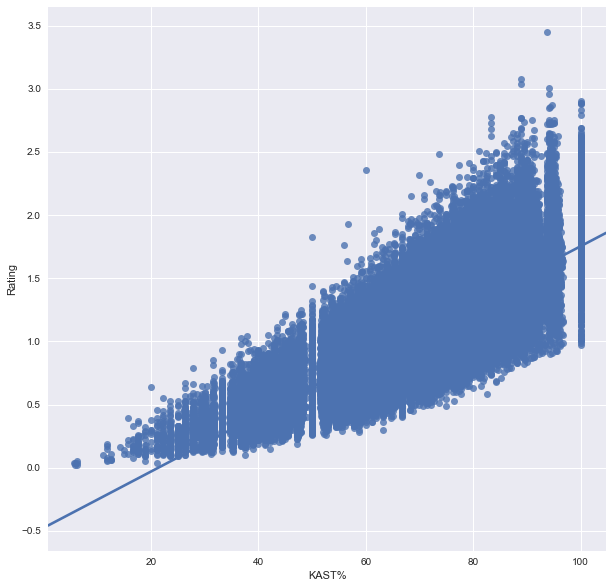

In [47]:
sns.regplot(x="KAST%", y="Rating", data=players)

### From the above graph we can see that our model is significant

In [48]:
players.corr()

,Player,Kills,Deaths,ADR,KAST%,Rating
Player,1.000000,-0.025385,0.028689,-0.020219,-0.047879,-0.042919
Kills,-0.025385,1.000000,0.191377,0.720539,0.501117,0.716360
Deaths,0.028689,0.191377,1.000000,-0.242039,-0.421411,-0.460916
ADR,-0.020219,0.720539,-0.242039,1.000000,0.602392,0.877931
KAST%,-0.047879,0.501117,-0.421411,0.602392,1.000000,0.800503
Rating,-0.042919,0.716360,-0.460916,0.877931,0.800503,1.000000


In [49]:
players.dropna(inplace=True)
X= players.iloc[:,2:6].values
Y= players.iloc[:,6].values


In [50]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state=0)

In [51]:
#Fitting multiple linear model to training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
Y_pred = regressor.predict(X_test)

In [53]:
print (regressor.intercept_)
print (regressor.coef_)

0.182374067297
[ 0.02276029 -0.02557052  0.00652444  0.00634405]


In [54]:
players.Rating.count()

234584

In [55]:
#Building the optimal model using Backward Elimination 
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((234584,1)).astype(int), values=X, axis=1)
X_opt= X[:,[0,1,2,3,4]]
regressor_OLS = sm.OLS(endog= Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                 1.288e+06
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:48:26   Log-Likelihood:             2.7953e+05
No. Observations:              234584   AIC:                        -5.591e+05
Df Residuals:                  234579   BIC:                        -5.590e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1838      0.002    115.279      0.000       0.181       0.187
x1             0.0228   4.43e-05    513.898      0.000       0.023       0.023
x2            -0.0256   4.38e-05   -584.602      0.000      -0.026      -0.026
x3             0.0065   1.38e-05    471.650      0.000       0.006       0.007
x4             0.0063   1.76e-05    360.776      0.000       0.006       0.006
==============================================================================
Omnibus:                    16729.443   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38549.063
Skew:                           0.453   Prob(JB):                         0.00
Kurtosis:                       4.767   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X_opt= X[:,[ 0,1,3,4]]
regressor_OLS = sm.OLS(endog= Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 6.527e+05
Date:                Tue, 31 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:48:26   Log-Likelihood:             1.7410e+05
No. Observations:              234584   AIC:                        -3.482e+05
Df Residuals:                  234580   BIC:                        -3.481e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6025      0.001   -449.051      0.000      -0.605      -0.600
x1             0.0064   5.38e-05    118.697      0.000       0.006       0.006
x2             0.0100   1.95e-05    511.925      0.000       0.010       0.010
x3             0.0115   2.37e-05    485.828      0.000       0.011       0.012
==============================================================================
Omnibus:                     6943.393   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9012.181
Skew:                           0.348   Prob(JB):                         0.00
Kurtosis:                       3.662   Cond. No.                         598.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#X_opt= X[:,[ 0,3,4]]
#regressor_OLS = sm.OLS(endog= Y, exog=X_opt).fit()
#regressor_OLS.summary()

In [58]:
np.median(Y_test)

1.04

In [59]:
Y1 = np.mean(Y)
Y1

1.0625167956893906

In [60]:
Y_m=np.mean(Y_test)
Y_m

1.062752094123665

In [61]:
rmse_regression = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse_regression

0.073070617012648914

In [62]:
regression_predicted = pd.DataFrame([])
regression_predicted = regression_predicted.append(pd.DataFrame({'Y_test':Y_test, 'Y_pred' :Y_pred}), ignore_index=True)
regression_predicted.head()

,Y_pred,Y_test
0,0.918073,0.94
1,0.800584,0.79
2,1.120146,1.04
3,0.971438,0.93
4,1.370239,1.32


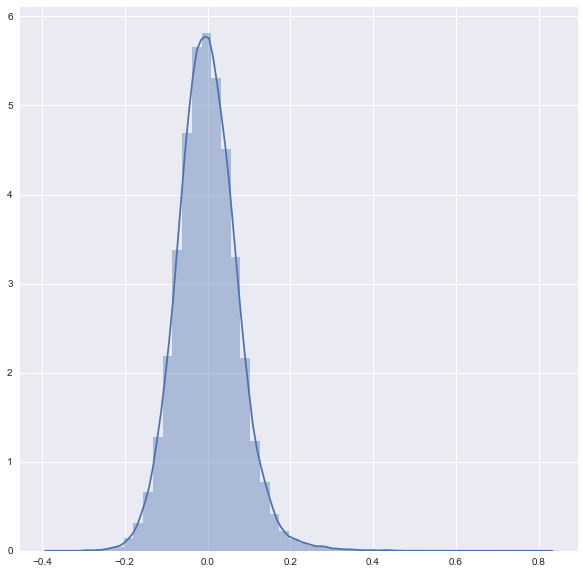

In [63]:
#Residual Plot
sns.distplot((Y_test-Y_pred), bins=50)

# KFOLD

In [64]:
from sklearn.model_selection import KFold
X= players.iloc[:,2:6].values
Y= players.iloc[:,6].values
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [65]:
test= list()
from sklearn.linear_model import LinearRegression
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]    
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_test)
    print("TRAIN", train_index, "TEST", test_index)
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    print(rmse)
    test.append(rmse)
print(test)



TRAIN [ 46917  46918  46919 ..., 234581 234582 234583] TEST [    0     1     2 ..., 46914 46915 46916]
0.0730766786519
TRAIN [     0      1      2 ..., 234581 234582 234583] TEST [46917 46918 46919 ..., 93831 93832 93833]
0.0741896950535
TRAIN [     0      1      2 ..., 234581 234582 234583] TEST [ 93834  93835  93836 ..., 140748 140749 140750]
0.0733521253634
TRAIN [     0      1      2 ..., 234581 234582 234583] TEST [140751 140752 140753 ..., 187665 187666 187667]
0.0741050906353
TRAIN [     0      1      2 ..., 187665 187666 187667] TEST [187668 187669 187670 ..., 234581 234582 234583]
0.07276217842
[0.073076678651898874, 0.074189695053503091, 0.073352125363351964, 0.074105090635273846, 0.072762178420023901]


In [75]:
kfold_avg=np.mean(test)
kfold_avg

0.073497153624810338

# Ridge Regression

In [67]:

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)

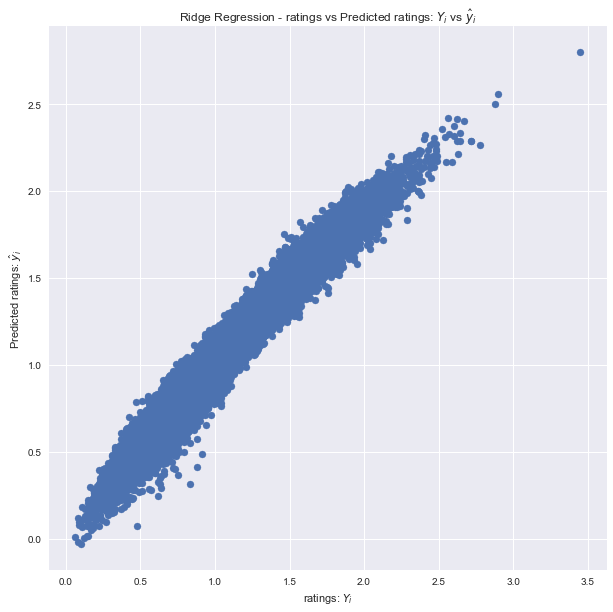

In [68]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("ratings: $Y_i$")
plt.ylabel("Predicted ratings: $\hat{y}_i$")
plt.title("Ridge Regression - ratings vs Predicted ratings: $Y_i$ vs $\hat{y}_i$")

In [69]:
np.median(Y_test)

1.04

In [70]:
y_m=np.mean(Y_test)

In [71]:
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse_ridge

0.07276217887136667

In [72]:
Ridge_predicted = pd.DataFrame([])
Ridge_predicted = Ridge_predicted.append(pd.DataFrame({'Y_test':Y_test, 'Y_pred' :Y_pred}), ignore_index=True)
Ridge_predicted.head()

,Y_pred,Y_test
0,1.083315,1.12
1,0.972020,1.00
2,0.930911,0.95
3,0.953209,0.87
4,0.833918,0.85


In [73]:

print("The RMSE of Multiple Linear Regression is %.5f" %rmse_regression)
print("The RMSE of K-fold is %.5f" %kfold_avg)
print("The RMSE of ridge Regression is %.5f" %rmse_ridge)

The RMSE of Multiple Linear Regression is 0.07307
The RMSE of K-fold is 0.07350
The RMSE of ridge Regression is 0.07276


* Is the relationship significant?
  From the above graphs we can infer that relationship is significant.
    
* Are any model assumptions violated?
   Model assumptions are not violated.
    
* Does the model make sense?
Yes the model makes sense in prediction.

* Does regularization help? 
No, regularization will not help in prediction of my model